## Regression Analysis : First Machine Learning Algorithm !!

### Machine learning 
- is an application of artificial intelligence (AI) that provides systems the __ability to automatically learn and improve from experience without being explicitly programmed__.

<img style="float: left;" src = "./img/ml_definition.png" width="600" height="600">

<img style="float: left;" src = "./img/traditionalVsml.png" width="600" height="600">

### Types of Machine Learning

<img style="float: left;" src = "./img/types-ml.png" width="700" height="600">

<br>
<br>

<img style="float: left;" src = "./img/ml-ex.png" width="800" height="700">

__Why use linear regression?__

1. Easy to use
2. Easy to interpret
3. Basis for many methods
4. Runs fast
5. Most people have heard about it :-) 

### Libraries in Python for Linear Regression

The two most popular ones are

1. `scikit-learn`
2. `statsmodels`

Highly recommend learning `scikit-learn` since that's also the machine learning package in Python.

### Linear regression 

Let's use `scikit-lean` for this example. 

Linear regression is of the form:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is what we have to predict/independent variable/response variable
- $\beta_0$ is the intercept/slope
- $\beta_1$ is the coefficient for $x_1$ (the first feature/dependent variable)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature/dependent variable)

The $\beta$ are called *model coefficients*

The model coefficients are estimated in this process. (In Machine Learning parlance - the weights are learned using the algorithm). The objective function is least squares method. 
<br>

**Least Squares Method** : To identify the weights so that the overall solution minimizes the sum of the squares of the errors made in the results of every single equation. [Wiki](https://en.wikipedia.org/wiki/Least_squares)

<img style="float: left;" src = "./img/lin_reg.jpg" width="600" height="600">

<h2> Model Building & Testing Methodology </h2>
<img src="img/train_test.png" alt="Train & Test Methodology" width="700" height="600">
<br>
<br>
<br>

### Must read blog:
Interpretable Machine Learning by Christoph
https://christophm.github.io/interpretable-ml-book/intro.html

In [1]:
# Step1: Import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [2]:
# Step2:  Load our data
df = pd.read_csv('./data/Mall_Customers.csv')
df.rename(columns={'CustomerID':'id','Spending Score (1-100)':'score','Annual Income (k$)':'income'},inplace=True)
df.head() # Visualize first 5 rows of data
df.tail()

,id,Gender,Age,income,score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [3]:
# Step3: Feature Engineering - transforming variables as appropriate for inputs to Machine Learning Algorithm
# transforming categorical variable Gender using One hot encodding
gender_onhot = pd.get_dummies(df['Gender'])
gender_onhot.tail()

,Female,Male
195,1,0
196,1,0
197,0,1
198,0,1
199,0,1


In [4]:
# Create input dataset aka X
X = pd.merge(df[['Age','income']], gender_onhot, left_index=True, right_index=True)
X.head()

,Age,income,Female,Male
0,19,15,0,1
1,21,15,0,1
2,20,16,1,0
3,23,16,1,0
4,31,17,1,0


Correlation between variables.........


,Age,income,Female,Male
Age,1.000000,-0.012398,-0.060867,0.060867
income,-0.012398,1.000000,-0.056410,0.056410
Female,-0.060867,-0.056410,1.000000,-1.000000
Male,0.060867,0.056410,-1.000000,1.000000


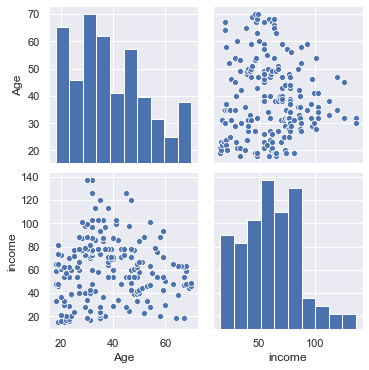

In [5]:
sns.pairplot(X[['Age','income']])
print("Correlation between variables.........")
X.iloc[:,:4].corr()

In [6]:
# Create target variable
Y = df['score']
Y.head()

0    39
1    81
2     6
3    77
4    40
Name: score, dtype: int64

In [14]:
# Step3: Split data in train & test set
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20, random_state = 20)
print('Shape of Training Xs:{}'.format(X_train.shape))
print('Shape of Test Xs:{}'.format(X_test.shape))

Shape of Training Xs:(160, 4)
Shape of Test Xs:(40, 4)


In [15]:
X_train[0:10]

,Age,income,Female,Male
152,44,78,1,0
67,68,48,1,0
133,31,72,1,0
59,53,46,0,1
63,54,47,1,0
184,41,99,1,0
174,52,88,1,0
122,40,69,1,0
111,19,63,1,0
130,47,71,0,1


In [16]:
# Step4: Build Linear Regression Analysis Model
learner = LinearRegression(); #initializing linear regression model

learner.fit(X_train,y_train); #training the linear regression model
y_predicted = learner.predict(X_test)
score=learner.score(X_test,y_test);#testing the linear regression model

### Interpretation

__Score__: R^2 (pronounced as R Square) it is also called as __coefficient of determination__ of prediction.

__Range of Score values__: 0 to 1 , 0 -> No relation between predicted Y and input Xs, 1 -> best case scenario where predicted value is same as actual value.
__Formula for Score__: R^2 = (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()

In [17]:
print(score)
print(y_predicted)

0.16431576885197385
[46.52462463 50.3596258  58.73828191 37.94578117 35.41242883 50.44407518
 54.26935413 44.59877142 56.55629542 49.84794319 46.87199146 48.84006936
 53.33071643 46.76260661 59.11858225 53.44010128 55.28844219 51.99213507
 50.10156947 50.40584951 38.61750241 59.10929108 44.34306918 52.79731454
 52.38764866 52.8306791  51.11979543 46.75817654 59.84817248 55.88900425
 45.68208159 51.38271288 45.48189424 39.56100122 53.61135414 44.80088182
 51.06871062 44.94363123 41.85194153 50.20166314]


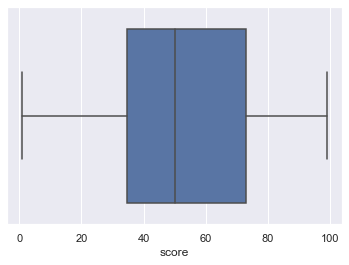

In [18]:
sns.boxplot(x = df['score'])

In [ ]:
sns.distplot(df['score'])

In [19]:
# Step5: Check Accuracy of Model
df_new = pd.DataFrame({"true_score":y_test,"predicted_score":y_predicted})
df_new

,true_score,predicted_score
150,17,46.524625
28,31,50.359626
13,77,58.738282
178,14,37.945781
109,48,35.412429
168,27,50.444075
177,69,54.269354
196,28,44.598771
47,47,56.556295
195,79,49.847943


In [20]:
# Step6: Diagnostic analysis
from sklearn.metrics import mean_squared_error, r2_score
print("Intercept is at: %.2f"%(learner.intercept_))
# The coefficients
print('Coefficients: \n', learner.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.4f' % r2_score(y_test, y_predicted))

Intercept is at: 71.18
Coefficients: 
 [-0.50489844 -0.03336456  0.34272124 -0.34272124]
Mean squared error: 587.76
Variance score: 0.1643


In [ ]:
y_hat = 71.48 - 0.504 * Age - 0.03* Income + 0.34* Female - 0.34*Male -> Linear Regression